reading, storing, and plotting data

In [125]:
import matplotlib.pyplot as plt
import random as rnd
from math import dist

# ----- read and clean datapoints -----
def generate_data_from_file():

    file_path = "assets/datapoints.txt"

    with open(file_path, "r") as file_r:
        datapoints = [row.strip("\n").split(", ") for row in file_r] # split each row into a list of 3 elements, remove newlines, and store list as element in datapoints list
        datapoints.remove(datapoints[0]) # remove column header
        datapoints = [[float(element) for element in point] for point in datapoints]

    data = { # dictionary containing all pokemon, and their width/height measurements
        "pikachu" : {
        "width"   : [i[0] for i in datapoints if i[2] == 1],
        "height"  : [i[1] for i in datapoints if i[2] == 1]
        },
        "pichu"   : {
        "width"   : [i[0] for i in datapoints if i[2] == 0],
        "height"  : [i[1] for i in datapoints if i[2] == 0]
        }
    }

    return data

# ----- read and clean testpoints -----
def generate_test_data_from_file():

    file_path = "assets/testpoints.txt"

    with open(file_path, "r") as file_r:
        testpoints = [row[4:-2].split(", ") for row in file_r]
        testpoints.remove(testpoints[0])
        testpoints = [[float(element) for element in point] for point in testpoints]

    test_data = {
        "width"   : [i[0] for i in testpoints],
        "height"  : [i[1] for i in testpoints]
    }

    # test_data = [[i[0], i[1]] for i in testpoints]

    return test_data
        
# ----- plot data from datapoints -----
def plot_data(data, test_data = 0):
    plt.scatter(data["pikachu"]["width"],  data["pikachu"]["height"], color = "orange", label = "Pikachus")
    plt.scatter(data["pichu"]["width"],    data["pichu"]["height"],   color = "brown",  label = "Pichus")

    if test_data != 0: # if test data is added as input parameter when function is called:
        plt.scatter(test_data["width"],  test_data["height"], color = "blue", label = "Undefined") # plot test data points as well

    plt.title("Scatterplot of width / height measurements of pokemon")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.legend();

# ----- error handling of user input -----
def clean_user_input():
    while True:
        user_input = input("Enter a manual point to classify, formatted like 'width, height' (x, y):")
        print(user_input)
        try:
            user_input = user_input.split(",")
            user_input = [float(i.strip()) for i in user_input] # remove empty space

            if len(user_input) > 2:
                print("Make sure to enter a point with 2 values")

            x = user_input[0]
            y = user_input[1]

            if len(user_input) == 3: # to enter majority vote number
                z = user_input[2]

            print(x)
            print(y)

            if len(user_input) == 3:
                return x, y, z # TODO implement 'z' as majority vote number to pass into distance function

            return x, y
            
        except ValueError as err:
            print(f"{err} is not a valid point, make sure to enter numbers")

# ----- calculate euclidean distance between data and test points -----
def categorize_point(point, data, amount_votes = 1):

    distance_list = []

    for i in range(len(data["pikachu"]["width"])): # calculate distance between all pikachu / pichu points and (x, y), and store them in distance
        distance_list.append([dist((data["pikachu"]["width"][i], data["pikachu"]["height"][i]), (point[0], point[1])), "pikachu"])
        distance_list.append([dist((data["pichu"]["width"][i], data["pichu"]["height"][i]), (point[0], point[1])), "pichu"])

    distance_list.sort() # sort distance, this sorts on the first index of lists in distance list, and keeps the pokemon tag

    del distance_list[amount_votes::] # remove indices of distance outside the votes specified to be taken into consideration

    category = ""
    certainty = 0

    distance_pikachu = [distance[0] for distance in distance_list if distance[1] == "pikachu"]
    distance_pichu = [distance[0] for distance in distance_list if distance[1] == "pichu"]

    # TODO update weighting calculation of results for better accuracy

    # ----- avoid division by 0 if one pokemon is not represented in votes -----
    if len(distance_pichu) == 0:
        category = "pikachu"
        certainty = 1
        return category, certainty

    elif len(distance_pikachu) == 0:
        category = "pichu"
        certainty = 1
        return category, certainty

    # ----- calculate weight if results are mixed -----
    weight_pikachu = sum(distance_pikachu) / len(distance_pikachu)
    weight_pichu = sum(distance_pichu) / len(distance_pichu)

    # NOTE: use to manually check output for errors (such as distance being 0.0 -> same point used twice)
    #print(f"\n{distance_list}")
    #print(f"Pika: weight = {weight_pikachu}, amount = {len(distance_pikachu)},\nPichu: weight = {weight_pichu}, amount = {len(distance_pichu)}")

    if weight_pikachu < weight_pichu:
        category = "pikachu"
        certainty = weight_pichu / (weight_pikachu + weight_pichu)
        return category, certainty

    else:
        category = "pichu"
        certainty = weight_pikachu / (weight_pichu + weight_pikachu)
        return category, certainty

# ----- randomly split data into test and training data -----
def generate_test_training_data(data):

    test_data       = {"pikachu" : {"width" : [], "height" : []}, "pichu" : {"width" : [], "height" : []}}
    training_data   = {"pikachu" : {"width" : [], "height" : []}, "pichu" : {"width" : [], "height" : []}}

    # ----- randomly splitting pikachus into test and training groups -----
    random_point_pikachu = rnd.sample(range(0, 75), 25)
    test_data["pikachu"]["width"] = [data["pikachu"]["width"][i] for i in random_point_pikachu]
    test_data["pikachu"]["height"] = [data["pikachu"]["height"][i] for i in random_point_pikachu]

    training_data["pikachu"]["width"] = [data["pikachu"]["width"][i] for i in range(75) if i not in random_point_pikachu]
    training_data["pikachu"]["height"] = [data["pikachu"]["height"][i] for i in range(75) if i not in random_point_pikachu]

    # ----- randomly splitting pichus into test and training groups -----
    random_point_pichu = rnd.sample(range(0, 75), 25) # second random here for pichu randoms
    test_data["pichu"]["width"] = [data["pichu"]["width"][i] for i in random_point_pichu]
    test_data["pichu"]["height"] = [data["pichu"]["height"][i] for i in random_point_pichu]

    training_data["pichu"]["width"] = [data["pichu"]["width"][i] for i in range(75) if i not in random_point_pichu]
    training_data["pichu"]["height"] = [data["pichu"]["height"][i] for i in range(75) if i not in random_point_pichu]

    # NOTE: use to check that no same point is picked twice:
    # print(f"Random Point: {random_point_pikachu}")
    # print(f"Not random: {[i for i in range(75) if i not in random_point_pikachu]}")

    return test_data, training_data # to use in functions

# ----- calculate accuracy of calculations by comparing generated test and training data -----
def calculate_accuracy(test_data, data, amount_votes = 1):

    TP, TN, FP, FN = 0, 0, 0, 0

    for i in range(len(test_data["pikachu"]["width"])):

        res = categorize_point([test_data["pikachu"]["width"][i], test_data["pikachu"]["height"][i]], data,  amount_votes)
        #if "pikachu" in res:
        if res[0] == "pikachu":
            TP += 1
        else:
            FP += 1
        
        res = categorize_point([test_data["pichu"]["width"][i], test_data["pichu"]["height"][i]], data,  amount_votes)
        #if "pichu" in res:
        if res[0] == "pichu":
            TN += 1
        else:
            FN += 1
    print(TP, TN, FP, FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return accuracy


In [63]:
# TODO make sure all datastructures are saved the same way
# TODO fix up accuracy function

In [126]:
data = generate_data_from_file() # read in datapoints file and store as data
test_data, training_data = generate_test_training_data(data) # split datapoints in data randomly into 2 groups; test and training data

# NOTE: same_points checks for errors in randomly splitting data into 2, use to double check that no same point is used twice
# same_points = [[i, test_data["pikachu"]["width"][i]] for i in range(len(test_data["pikachu"]["width"])) if test_data["pikachu"]["width"][i] in training_data["pikachu"]["width"]]
# print(f"Same Points: {same_points}")

accuracy = calculate_accuracy(test_data, training_data, 1) # categorize points of test data compared to training data, and calculate accuracy of predictions
print(accuracy) # print accuracy results

24 22 1 3
0.92


## Read, clean, and store data from files

In [127]:
data = generate_data_from_file()
test_data = generate_test_data_from_file()

## Plot datapoints, and test points (optional)

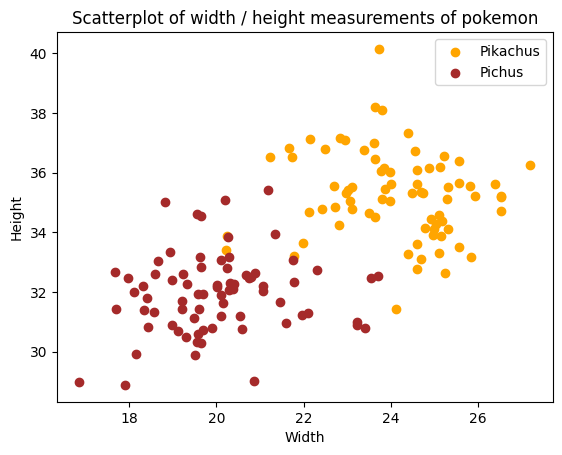

In [128]:
plot_data(data) # plot datapoints
# plot_data(data, test_data) # NOTE: can also plot unclassified datapoints

## Calculate distance from test point to nearest n datapoints, and categorize test point based on weighted results

In [129]:
#data = generate_data_from_file()
#test_data = generate_test_data_from_file()

#print(test_data)
#print(len(test_data["width"]))

for point in range(len(test_data["width"])):
    amount_votes = 1
    result = categorize_point([test_data["width"][point], test_data["height"][point]], data, amount_votes)
    print(f"Point {point + 1} calculated as {result[0]} with {result[1] * 100:.1f}% certainty (based on a majority vote of {amount_votes})")

Point 1 calculated as pikachu with 100.0% certainty (based on a majority vote of 1)
Point 2 calculated as pikachu with 100.0% certainty (based on a majority vote of 1)
Point 3 calculated as pikachu with 100.0% certainty (based on a majority vote of 1)
Point 4 calculated as pichu with 100.0% certainty (based on a majority vote of 1)


## Read and classify manual user input

In [130]:
user_input = clean_user_input()
distance = categorize_point(user_input, data, 10)
print(distance)

1,1
1.0
1.0
('pichu', 1)
